# Evaluation

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Read in Results

### Read in User Curation

In [56]:
%pwd

'/home/jovyan/work/complete_workflow/evaluation'

In [57]:
# user_curation_df = pd.read_csv('./user_feedback/V0_Feedback_test.csv')

user_curation_df = pd.read_csv('./user_feedback/V0_Feedback - V0_Corey_final.csv')

In [58]:
user_curation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_variable     312 non-null    object 
 1   user_description  312 non-null    object 
 2   matched_text      312 non-null    object 
 3   uid               312 non-null    int64  
 4   relevance_score   312 non-null    float64
 5   cohere_rank       312 non-null    object 
 6   llm_alignment     104 non-null    object 
 7   llm_rank          103 non-null    object 
 8   cohere_llm_match  103 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 22.1+ KB


In [59]:
llm_relevancy_list_v2 = [float(i) for i in user_curation_df['relevance_score']]
print(sum(llm_relevancy_list_v2))

211.20680353300006


In [60]:
avg_llm_relevancy_v2 = sum(llm_relevancy_list_v2)/len(llm_relevancy_list_v2)
print(f"The average llm relevancy score is: {avg_llm_relevancy_v2}")

The average llm relevancy score is: 0.6769448831185899


In [61]:
cohere_feedback = [i.lower() for i in user_curation_df['cohere_rank']]




In [62]:
cohere_matches = 0
for i in range(len(llm_relevancy_list_v2)):
    if llm_relevancy_list_v2[i]<=0.3 and cohere_feedback[i]=='failure':
        cohere_matches = cohere_matches + 1
    elif llm_relevancy_list_v2[i]>0.3 and llm_relevancy_list_v2[i]<=0.7 and cohere_feedback[i]=='neutral':
        cohere_matches = cohere_matches + 1
    elif llm_relevancy_list_v2[i]>0.7 and cohere_feedback[i]=='success':
        cohere_matches = cohere_matches + 1

llm_vs_feedback_percentage = cohere_matches/len(llm_relevancy_list_v2)
print(f"Percentage of time that Cohere results matched feedback from RTI team: {llm_vs_feedback_percentage*100}%.")

Percentage of time that Cohere results matched feedback from RTI team: 50.0%.


In [63]:
llm_subset_df = user_curation_df.dropna(subset=['llm_rank'])
llm_feedback = [i.lower() for i in llm_subset_df['llm_rank']]
cohere_llm_subset_df = user_curation_df.dropna(subset=['cohere_llm_match'])
cohere_llm_agreement = [i.lower() for i in cohere_llm_subset_df['cohere_llm_match']]
cohere_rank_llm_agreement_filter = [float(i) for i in cohere_llm_subset_df['relevance_score']]

## Visualizations

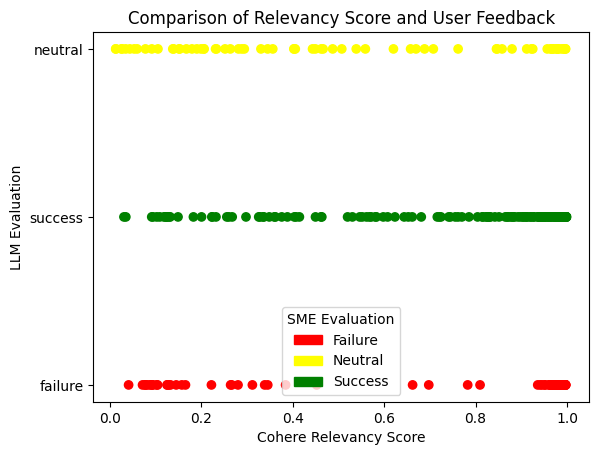

In [64]:
import matplotlib.patches as mpatches
# Cohere Relevancy score vs User Feedback
feedback_vals = cohere_feedback
colors = []
for i in range(len(cohere_feedback)):
    if (feedback_vals[i] == 'failure'): colors.append('red')
    elif (feedback_vals[i] == 'neutral'): colors.append('yellow')
    elif (feedback_vals[i] == 'success'): colors.append('green')
    else: colors[i] == 'white'

# x = list(range(0, len(llm_relevancy_list_v2)))
x = llm_relevancy_list_v2
y = cohere_feedback
graph = plt.scatter(x, y, marker='o', c=colors)
plt.xlabel('Cohere Relevancy Score')
plt.ylabel('LLM Evaluation')
plt.title('Comparison of Relevancy Score and User Feedback')
plt.legend(handles=[mpatches.Patch(color='red', label='Failure'), mpatches.Patch(color='yellow', label='Neutral'), mpatches.Patch(color='green', label='Success')], title="SME Evaluation")

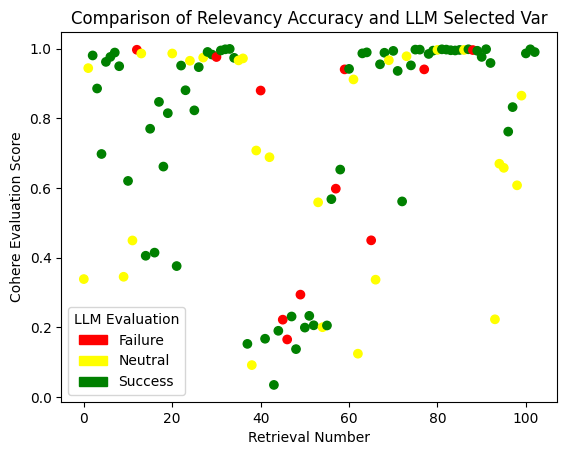

In [65]:
import matplotlib.patches as mpatches
# Cohere Relevancy score vs LLM Selected Var 

feedback_vals = cohere_llm_agreement
colors = []
for i in range(len(cohere_llm_agreement)):
    if (feedback_vals[i] == 'match'): colors.append('green')
    elif (feedback_vals[i] == 'mismatch'): colors.append('red')
    elif (feedback_vals[i] != ''): colors.append('yellow')
    else: colors[i] == 'white'

x = list(range(0, len(cohere_rank_llm_agreement_filter)))
y = cohere_rank_llm_agreement_filter
graph = plt.scatter(x, y, marker='o', c=colors)
plt.xlabel('Retrieval Number')
plt.ylabel('Cohere Evaluation Score')
plt.title('Comparison of Relevancy Accuracy and LLM Selected Var')
plt.legend(handles=[mpatches.Patch(color='red', label='Failure'), mpatches.Patch(color='yellow', label='Neutral'), mpatches.Patch(color='green', label='Success')], title="LLM Evaluation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


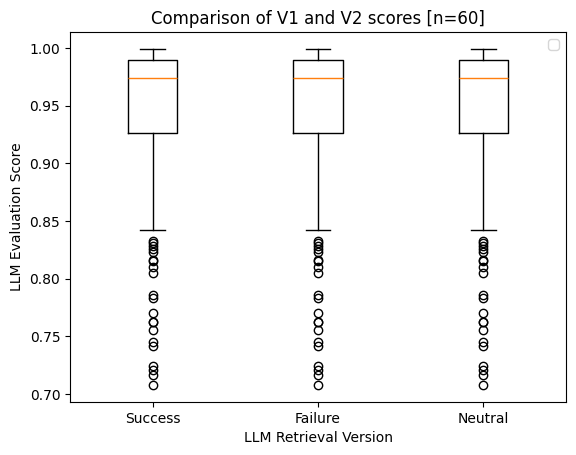

In [66]:
# Histogram of User Feedback vs and Relevancy Scores
import matplotlib.pyplot as plt
import numpy as np

x = list(range(0, len(llm_relevancy_list_v2)))
# y1 = success = [i for i in llm_relevancy_list_v2 if i>0.7]
# y2 = failure = [i for i in llm_relevancy_list_v2 if i>0.7]
# y3 = neutral = [i for i in llm_relevancy_list_v2 if i>0.7]

y1 = success = [i for i in llm_relevancy_list_v2 if i>0.7]
y2 = failure = [i for i in llm_relevancy_list_v2 if i>0.7]
y3 = neutral = [i for i in llm_relevancy_list_v2 if i>0.7]

plt.boxplot([y1,y2,y3], labels=['Success', 'Failure', 'Neutral'])

plt.xlabel("LLM Retrieval Version")
plt.ylabel("LLM Evaluation Score")
plt.title("Comparison of V1 and V2 scores [n=60]")    
plt.legend()
plt.show()

In [67]:
len(llm_relevancy_list_v2)

312

In [180]:
user_curation_df.columns
# tmpdf = pd.DataFrame(user_curation_df, columns=['relevance_score', 'cohere_rank', 'llm_alignment', 'llm_rank', 'cohere_llm_match'])
# print(tmpdf.head())
# print('-'*100)

llm_subset_df = tmpdf.dropna(subset=['llm_rank'])
print(llm_subset_df.head())
print(f'# of datapoints: {len(llm_subset_df.index)}')
print('-'*100)

llm_subset_df_collapsed = llm_subset_df.copy()
llm_subset_df_collapsed['cohere_llm_match'] = llm_subset_df_collapsed['cohere_llm_match'].replace(to_replace=r'.*Mismatch.*', value='Mismatch', regex=True)
print(llm_subset_df_collapsed)
print('-'*100)

# # llm_subset_df_expand = llm_subset_df.copy()
# filtered_df1 = llm_subset_df_collapsed[['relevance_score', 'llm_rank']]
# filtered_df2 = llm_subset_df_collapsed[['relevance_score', 'cohere_rank']]

# filtered_df = pd.concat([filtered_df1, filtered_df2])
# print(filtered_df)

# create two dfs
llm_rank_df = llm_subset_df_collapsed[['relevance_score', 'llm_rank']].copy()
cohere_rank_df = llm_subset_df_collapsed[['relevance_score', 'cohere_rank']].copy()

# add new column for source
llm_rank_df['Source'] = 'llm_rank'
cohere_rank_df['Source'] = 'cohere_rank'

# rename column for concatenation
llm_rank_df.rename(columns={'llm_rank': 'Rank'}, inplace=True)
cohere_rank_df.rename(columns={'cohere_rank': 'Rank'}, inplace=True)

# concatenate dfs
stacked_df = pd.concat([llm_rank_df, cohere_rank_df], axis=0)

# reset the index 
stacked_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(stacked_df)

    relevance_score cohere_rank  \
0          0.338842     Failure   
3          0.944074     Success   
6          0.980431     Neutral   
9          0.885632     Success   
12         0.697712     Failure   

                                        llm_alignment llm_rank  \
0   ALIGNMENT: To align the new variable with the ...  Failure   
3   ALIGNMENT: To align the new variable with the ...  Success   
6   ALIGNMENT: To align the new variable with "PER...  Neutral   
9   ALIGNMENT: To align the new variable "If amput...  Success   
12  ALIGNMENT: To align the new variable "The stud...  Failure   

   cohere_llm_match  
0        2-Mismatch  
3        2-Mismatch  
6             Match  
9             Match  
12            Match  
# of datapoints: 103
----------------------------------------------------------------------------------------------------
     relevance_score cohere_rank  \
0           0.338842     Failure   
3           0.944074     Success   
6           0.980431     Neutr

In [ ]:
!pip install seaborn

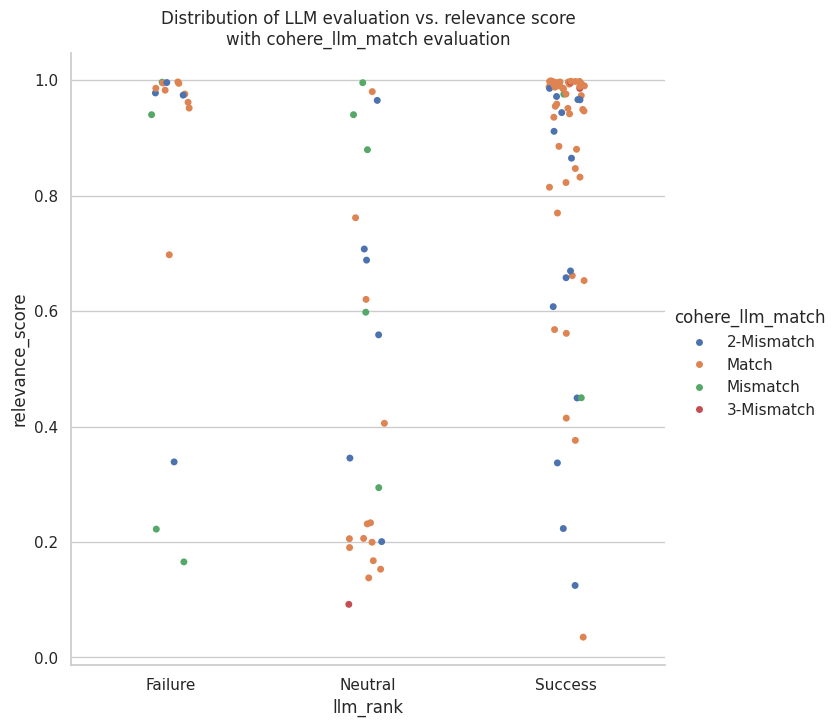

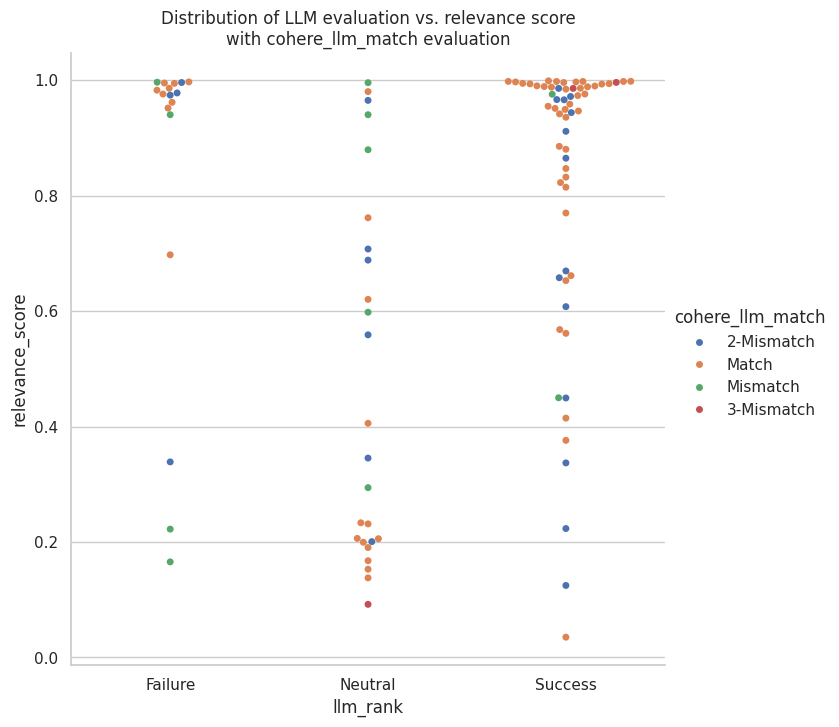

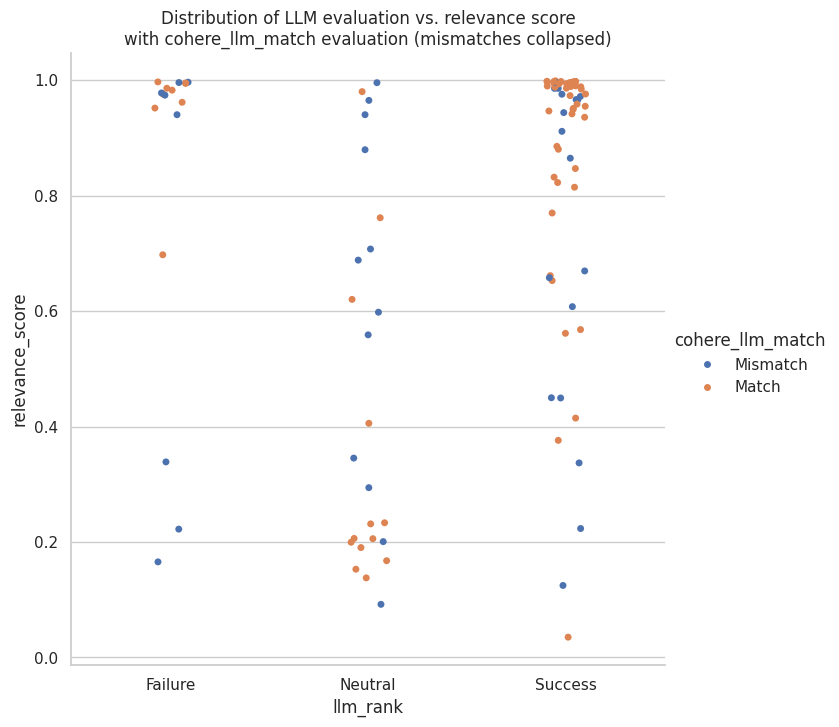

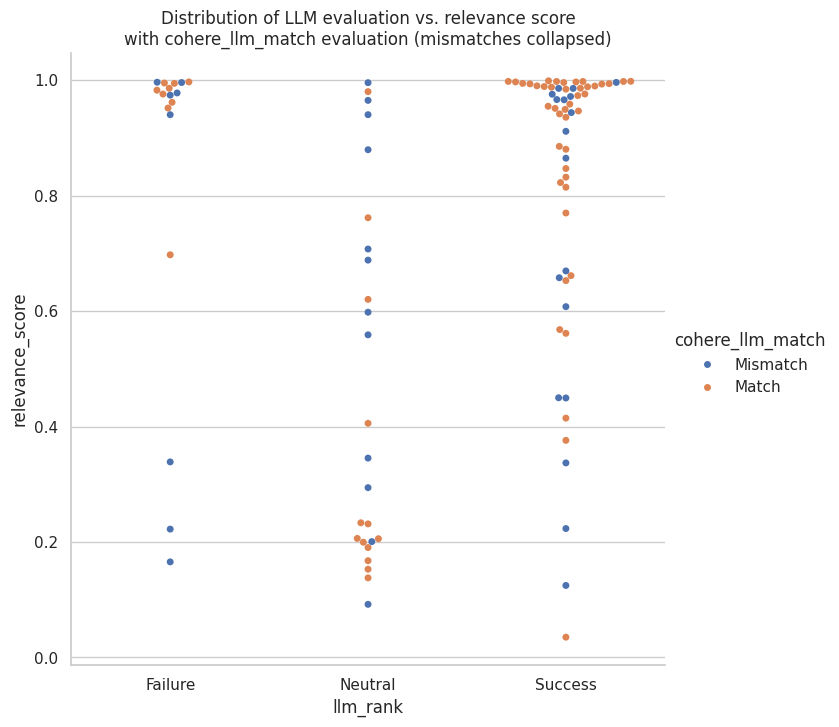

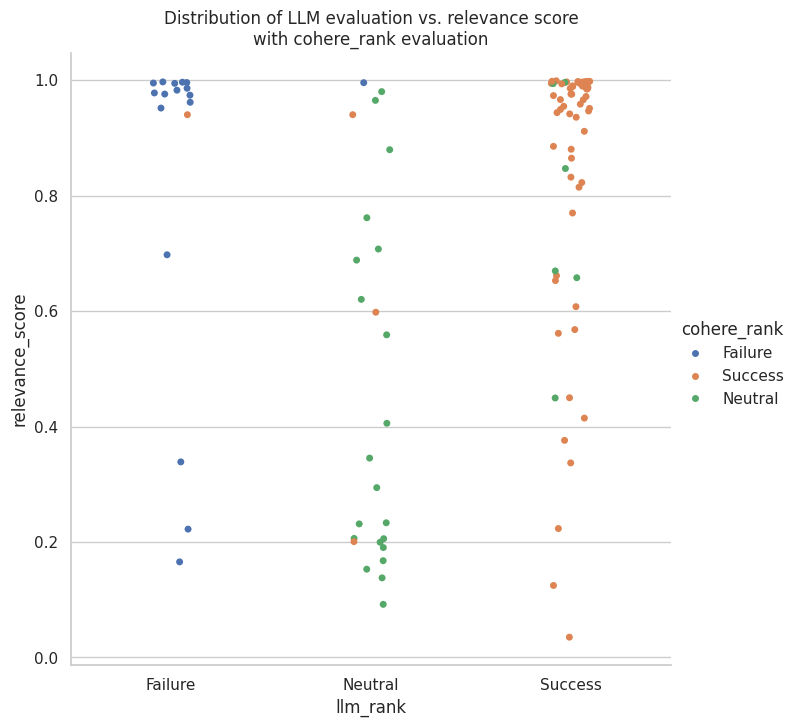

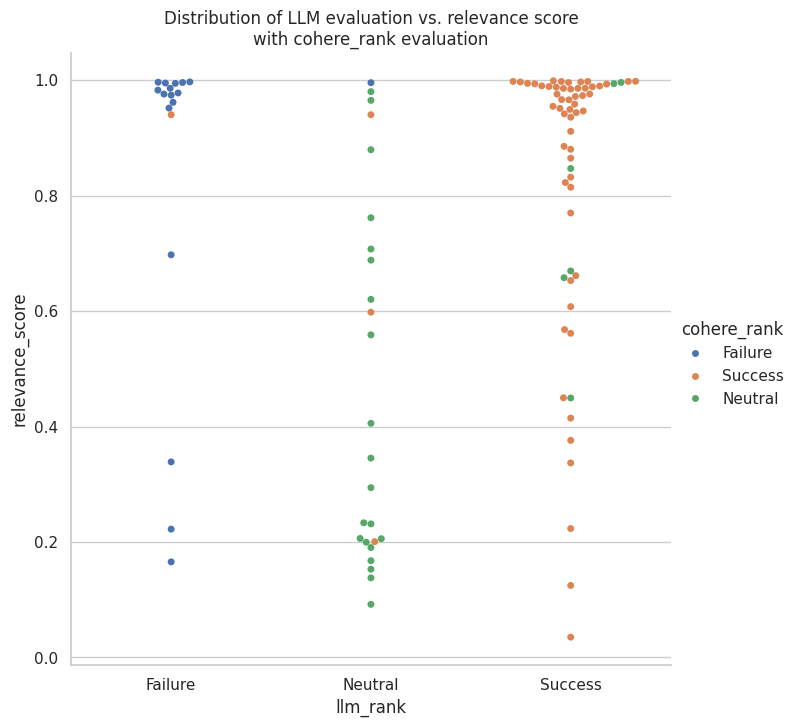

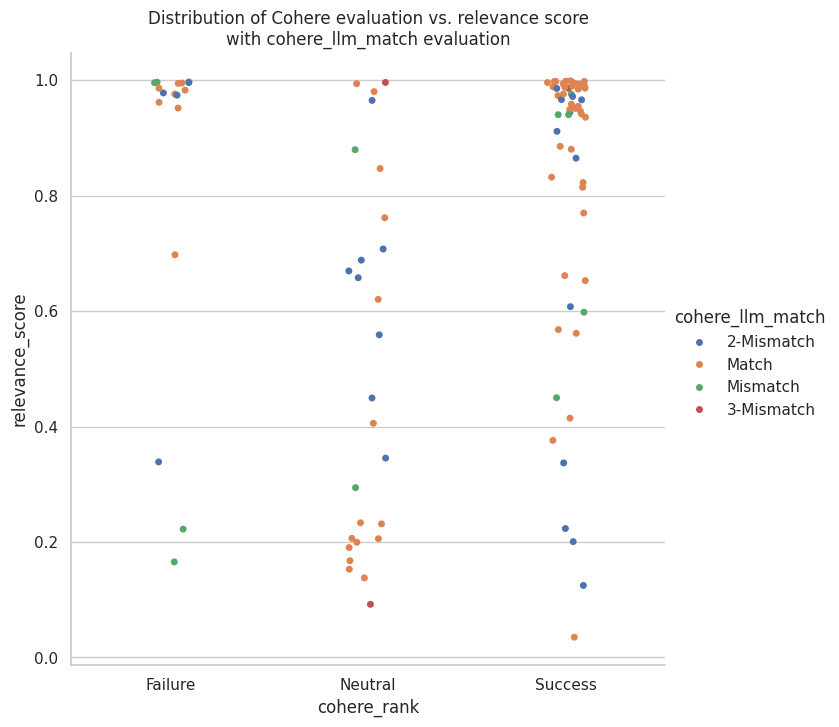

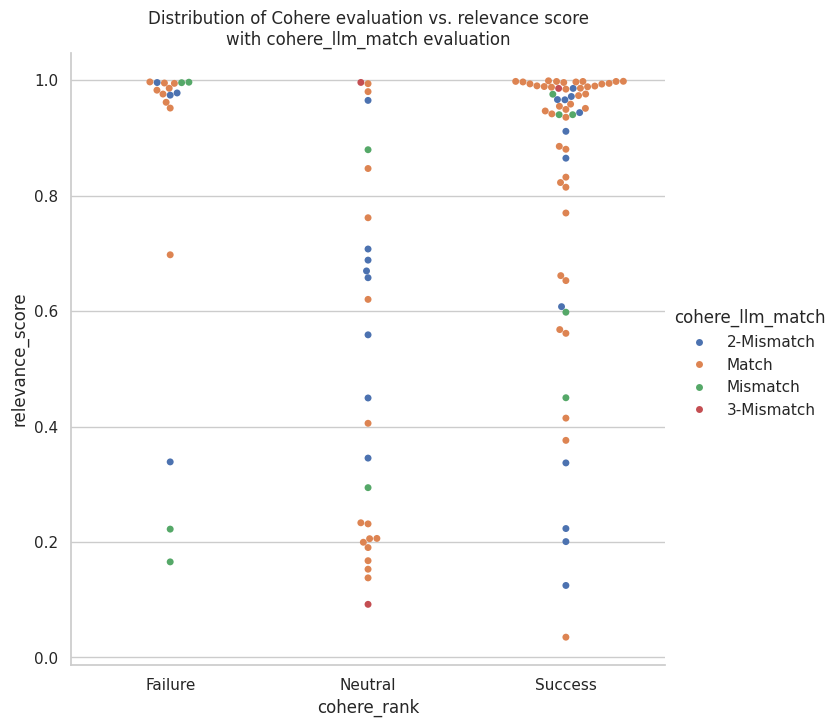

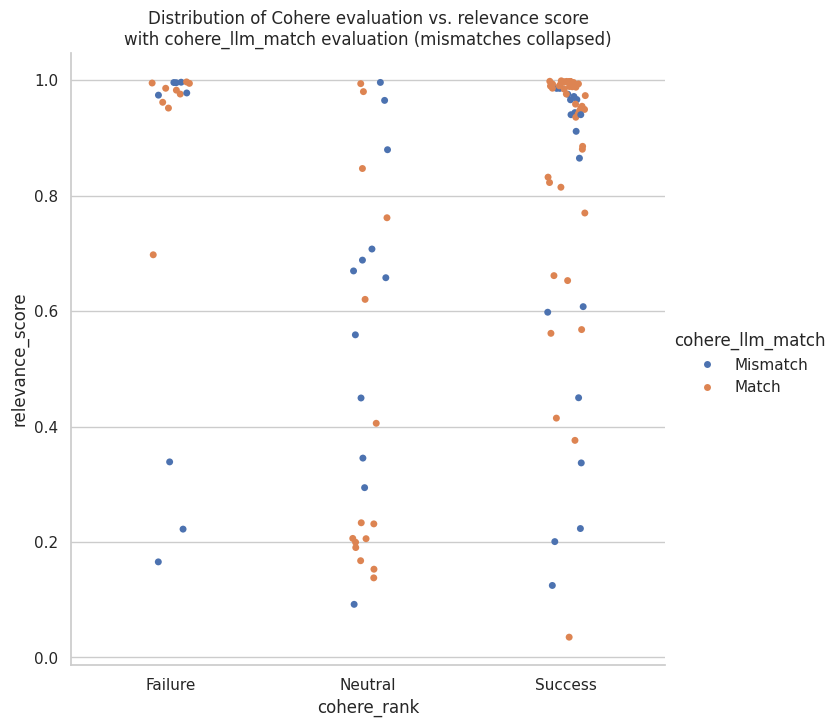

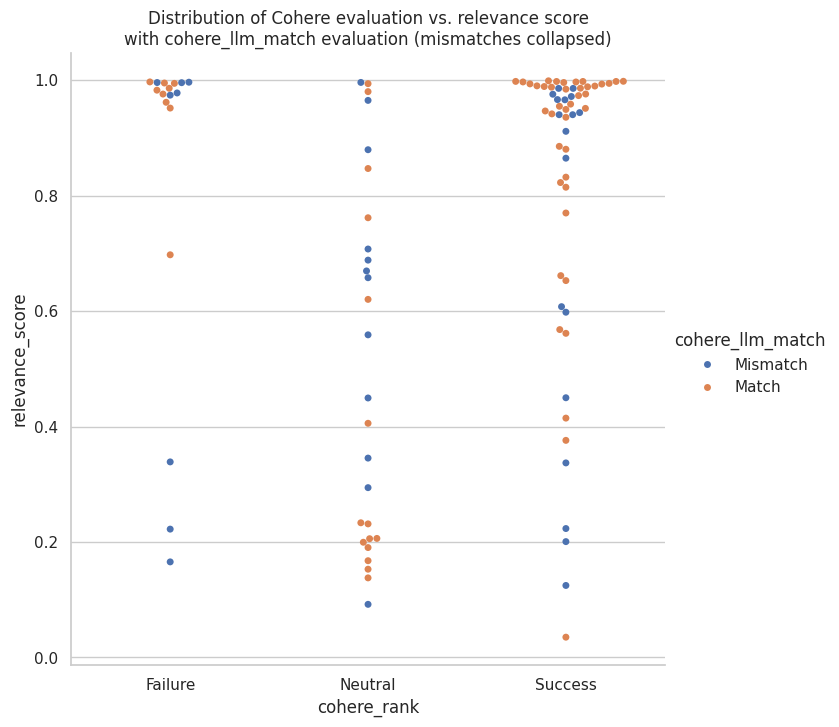

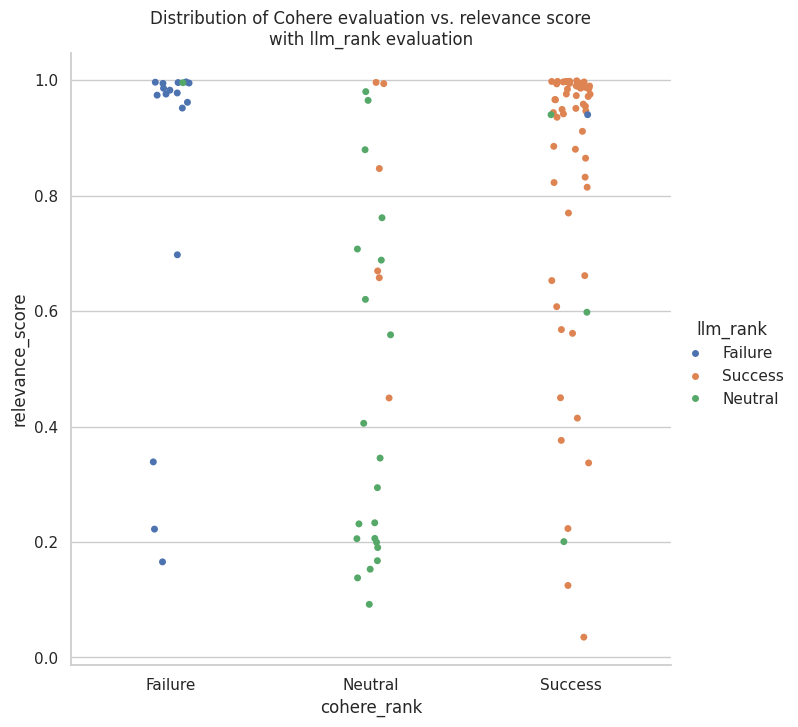

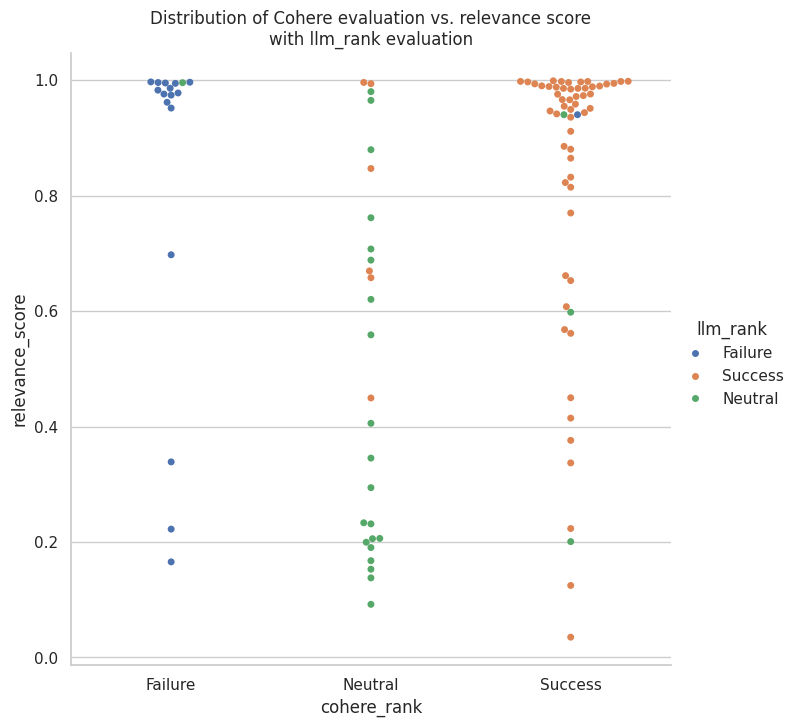

In [232]:
# Import seaborn
import seaborn as sns
from seaborn import catplot

# Apply the default theme
sns.set_style("whitegrid")

# 'relevance_score', 'cohere_rank', 'llm_alignment', 'llm_rank', 'cohere_llm_match'
# x=llm_rank
g = sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match")
g.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_llm_match evaluation")#xlabel="Fare", ylabel="")
gsw = sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match", kind='swarm')
gsw.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_llm_match evaluation")#xlabel="Fare", ylabel="")

h = sns.catplot(data=llm_subset_df_collapsed, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match")
h.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_llm_match evaluation (mismatches collapsed)")#xlabel="Fare", ylabel="")
hsw = sns.catplot(data=llm_subset_df_collapsed, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match", kind='swarm')
hsw.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_llm_match evaluation (mismatches collapsed)")#xlabel="Fare", ylabel="")

i = sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_rank")
i.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_rank evaluation")#xlabel="Fare", ylabel="")
isw = sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_rank", kind='swarm')
isw.set(title="Distribution of LLM evaluation vs. relevance score\nwith cohere_rank evaluation")#xlabel="Fare", ylabel="")

# x=cohere_rank
j = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match")
j.set(title="Distribution of Cohere evaluation vs. relevance score\nwith cohere_llm_match evaluation")#xlabel="Fare", ylabel="")
jsw = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match", kind='swarm')
jsw.set(title="Distribution of Cohere evaluation vs. relevance score\nwith cohere_llm_match evaluation")#xlabel="Fare", ylabel="")

k = sns.catplot(data=llm_subset_df_collapsed, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match")
k.set(title="Distribution of Cohere evaluation vs. relevance score\nwith cohere_llm_match evaluation (mismatches collapsed)")#xlabel="Fare", ylabel="")
ksw = sns.catplot(data=llm_subset_df_collapsed, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match", kind='swarm')
ksw.set(title="Distribution of Cohere evaluation vs. relevance score\nwith cohere_llm_match evaluation (mismatches collapsed)")#xlabel="Fare", ylabel="")

m = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="llm_rank")
m.set(title="Distribution of Cohere evaluation vs. relevance score\nwith llm_rank evaluation")#xlabel="Fare", ylabel="")
msw = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="llm_rank", kind='swarm')
msw.set(title="Distribution of Cohere evaluation vs. relevance score\nwith llm_rank evaluation")#xlabel="Fare", ylabel="")


# h = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], hue="cohere_llm_match")
# h.set(title="Distribution of LLM evaluation scoring ")#xlabel="Fare", ylabel="")
# sns.catplot(data=llm_subset_df, x="cohere_llm_match", y="relevance_score", order=['2-Mismatch', 'Mismatch', 'Match'], hue="llm_rank")

# save plots
g.savefig("./plots/g_llmVmatch.png") 
h.savefig("./plots/h_llmVmatch_collapsed.png")
i.savefig("./plots/i_llmVcohere.png")
j.savefig("./plots/j_cohereVmatch.png")
k.savefig("./plots/k_cohereVmatch_collapsed.png")
m.savefig("./plots/m_cohereVllm.png")


gsw.savefig("./plots/swarm_g_llmVmatch.png") 
hsw.savefig("./plots/swarm_h_llmVmatch_collapsed.png")
isw.savefig("./plots/swarm_i_llmVcohere.png")
jsw.savefig("./plots/swarm_j_cohereVmatch.png")
ksw.savefig("./plots/swarm_k_cohereVmatch_collapsed.png")
msw.savefig("./plots/swarm_m_cohereVllm.png")


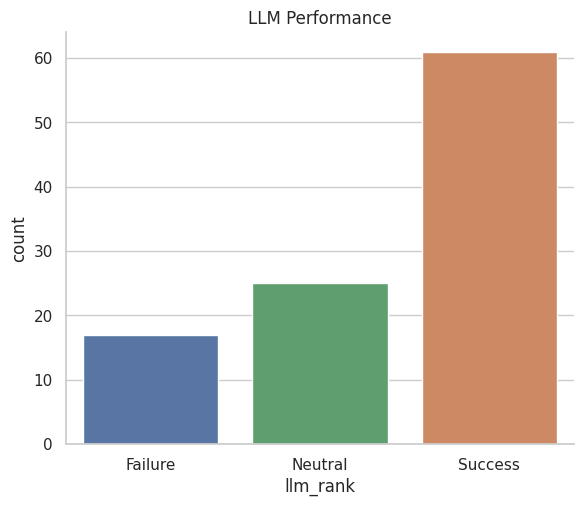

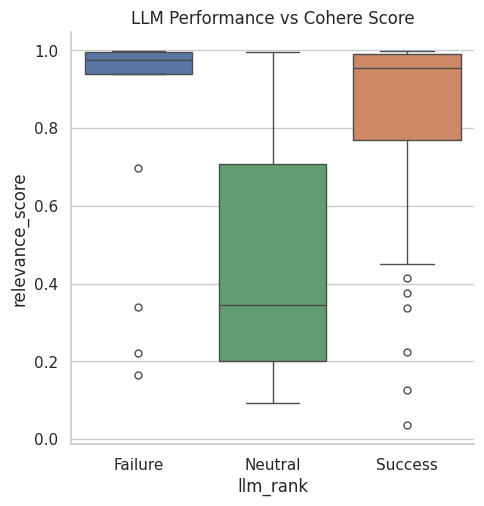

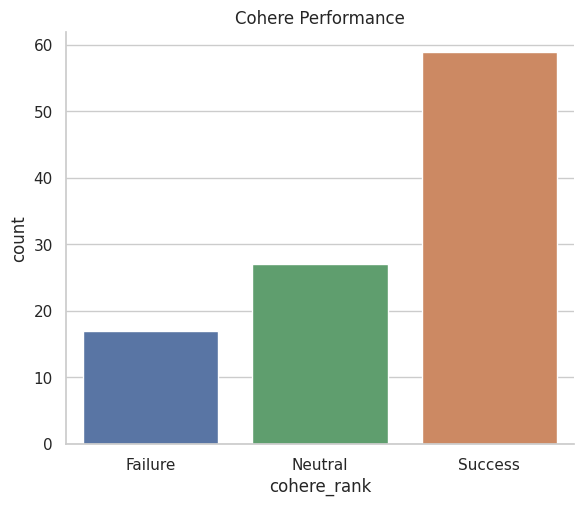

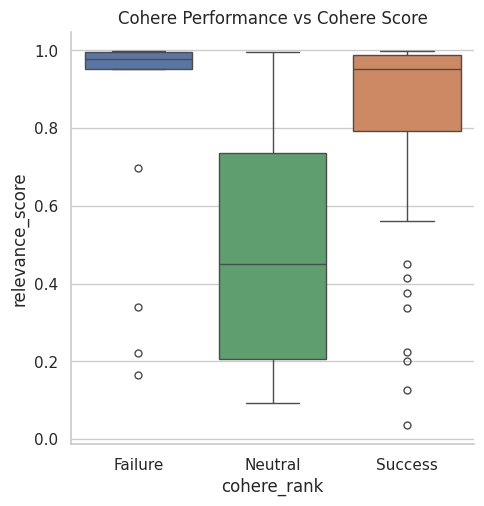

In [228]:
# sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# sns.catplot(data=llm_subset_df, x="cohere_llm_match", y="relevance_score", order=['2-Mismatch', 'Mismatch', 'Match'], kind="box")

# Plot counts for each category in 'llm_rank'
n=sns.catplot(data=llm_subset_df, x="llm_rank", height=5, order=['Failure', 'Neutral', 'Success'], hue="llm_rank", kind="count", aspect=1.2).despine()
n.set(title='LLM Performance')
o=sns.catplot(data=llm_subset_df, x="llm_rank", height=5, y="relevance_score", order=['Failure', 'Neutral', 'Success'], hue="llm_rank", kind="box").despine()
o.set(title='LLM Performance vs Cohere Score')
p=sns.catplot(data=llm_subset_df, x="cohere_rank", height=5, order=['Failure', 'Neutral', 'Success'], hue="cohere_rank", kind="count", aspect=1.2).despine()
p.set(title='Cohere Performance')
q=sns.catplot(data=llm_subset_df, x="cohere_rank", height=5, y="relevance_score", order=['Failure', 'Neutral', 'Success'], hue="cohere_rank", kind="box").despine()
q.set(title='Cohere Performance vs Cohere Score')

# save plots
n.savefig("./plots/n_llm_count.png") 
o.savefig("./plots/o_llm_box.png")
p.savefig("./plots/p_cohere_count.png")
q.savefig("./plots/q_cohere_box.png")


     relevance_score     Rank       Source
0           0.338842  Failure     llm_rank
1           0.944074  Success     llm_rank
2           0.980431  Neutral     llm_rank
3           0.885632  Success     llm_rank
4           0.697712  Failure     llm_rank
..               ...      ...          ...
201         0.607838  Success  cohere_rank
202         0.865110  Success  cohere_rank
203         0.986258  Failure  cohere_rank
204         0.998058  Success  cohere_rank
205         0.990102  Success  cohere_rank

[206 rows x 3 columns]


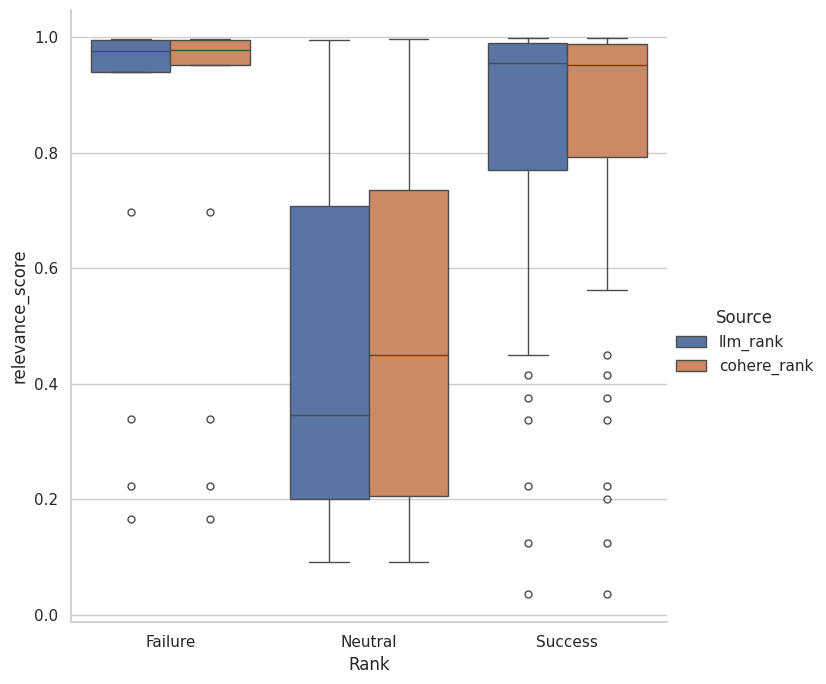

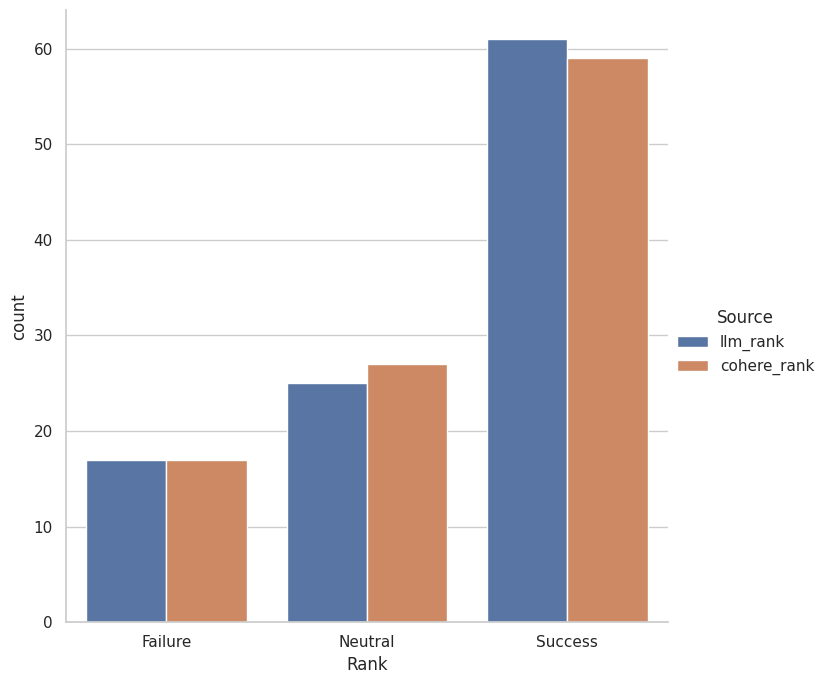

In [229]:
# Import seaborn
import seaborn as sns
from seaborn import catplot

# Apply the default theme
sns.set_style("whitegrid")

print(stacked_df)
# 'relevance_score', 'cohere_rank', 'llm_alignment', 'llm_rank', 'cohere_llm_match'
r = sns.catplot(data=stacked_df, x="Rank", y="relevance_score", height=7, order=['Failure', 'Neutral', 'Success'], hue="Source", kind="box")
r.savefig("./plots/r_llmVcohere_boxplot.png")

s = sns.catplot(data=stacked_df, x="Rank", height=7, order=['Failure', 'Neutral', 'Success'], hue="Source", kind="count")
s.savefig("./plots/s_llmVcohere_count.png")




In [273]:
import matplotlib.font_manager

fonts = sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))
for font in fonts:
    print(font)

DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


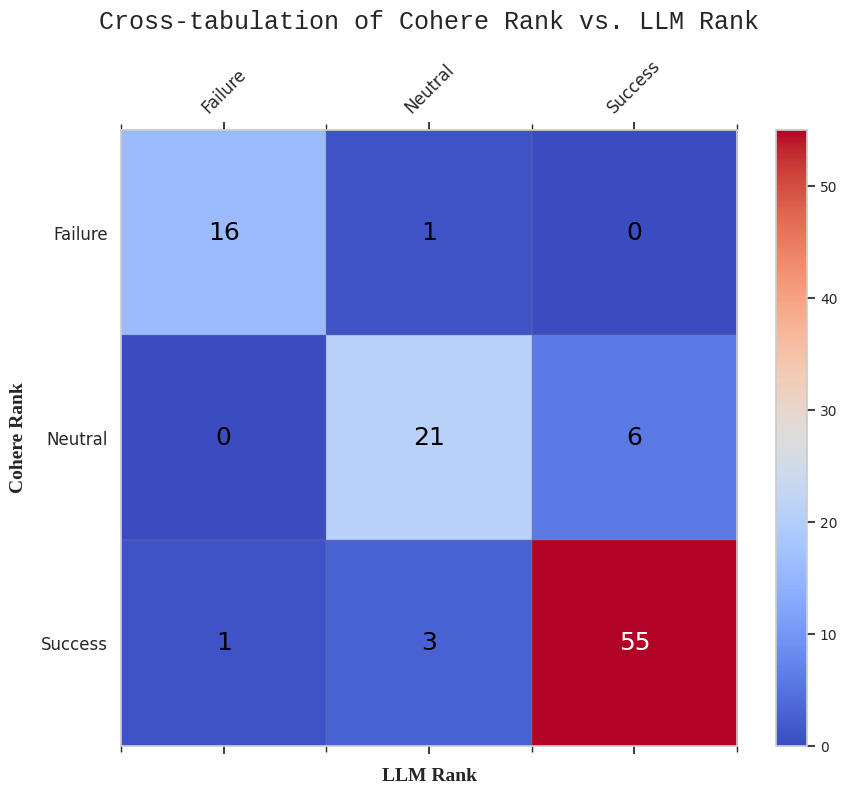

In [319]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'cohere_llm_subset_df' is already defined and contains 'cohere_rank' and 'llm_rank' columns

# Create a cross-tabulation table
ct = pd.crosstab(cohere_llm_subset_df['cohere_rank'], cohere_llm_subset_df['llm_rank'])


# Define font properties
title_font = {'family': 'Liberation Mono', 'weight': 'normal', 'size': 18}
label_font = {'family': 'Liberation Serif', 'weight': 'bold', 'size': 14}
tick_label_font = {'size': 12}  # Smaller size for tick labels

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size for better aspect ratio
cax = ax.matshow(ct, cmap='coolwarm')  # Use a more sophisticated colormap

# Add color bar for reference
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=10)  # Adjust color bar tick label size

# Set the major ticks at the right locations
ax.set_xticks(np.arange(len(ct.columns)))
ax.set_yticks(np.arange(len(ct.index)))

# Set the labels for the major ticks
ax.set_xticklabels(ct.columns, rotation=45, fontdict=tick_label_font)  # Apply custom font for tick labels
ax.set_yticklabels(ct.index, fontdict=tick_label_font)

# Add axis labels with custom fonts
ax.set_xlabel('LLM Rank', fontdict=label_font, labelpad=10)
ax.set_ylabel('Cohere Rank', fontdict=label_font, labelpad=10)

# Add a title with custom font
ax.set_title('Cross-tabulation of Cohere Rank vs. LLM Rank', fontdict=title_font, pad=20)

# Hide the grid lines
ax.grid(False)
# Optionally, set the minor tick marks to be in the center of the cells for the grid lines if needed
ax.set_xticks(np.arange(len(ct.columns) + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(len(ct.index) + 1) - 0.5, minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.3)  # Make gridlines more subtle

# Optional: Add values on the cells for better readability
for (i, j), val in np.ndenumerate(ct.values):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > ct.values.max() / 2 else 'black', fontsize=18)  # Adjust text color based on cell color

plt.savefig('./plots/heatmap_beautified.png', bbox_inches='tight', dpi=100)  # Save with high resolution
# plt.close()
plt.show()


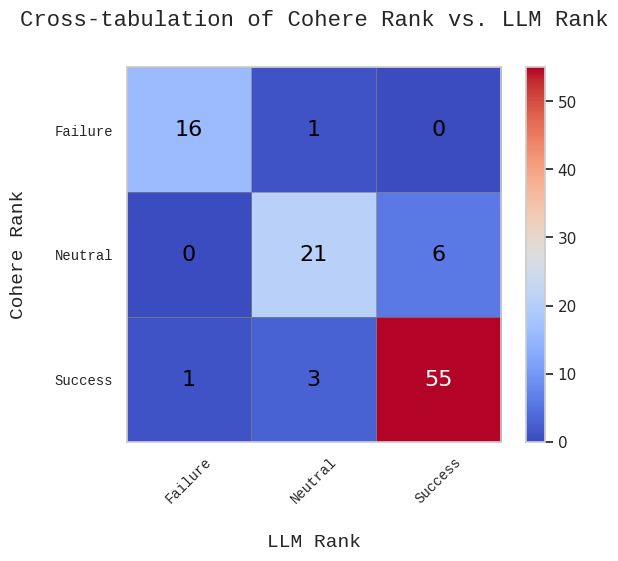

In [328]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assuming 'cohere_llm_subset_df' is already defined and contains 'cohere_rank' and 'llm_rank' columns
# Create a cross-tabulation table
ct = pd.crosstab(cohere_llm_subset_df['cohere_rank'], cohere_llm_subset_df['llm_rank'])

# Define font properties
title_font = {'family': 'Liberation Mono', 'weight': 'normal', 'size': 16}
label_font = {'family': 'Liberation Mono', 'size': 14}
axis_label = {'family': 'Liberation Mono', 'size': 10}

# Plotting
fig, ax = plt.subplots()
cax = ax.matshow(ct, cmap='coolwarm')
# Add color bar for reference
fig.colorbar(cax)

# Set the major ticks at the right locations
ax.set_xticks(np.arange(len(ct.columns)))
ax.set_yticks(np.arange(len(ct.index)))

# Set the labels for the major ticks
ax.set_xticklabels(ct.columns, rotation=45, fontdict=axis_label)
ax.set_yticklabels(ct.index, fontdict=axis_label)

# bring label to bottom x-axis
ax.xaxis.tick_bottom()

# Add axis labels
ax.set_xlabel('LLM Rank', fontdict=label_font, labelpad=20)  # Increase labelpad value here
ax.set_ylabel('Cohere Rank', fontdict=label_font, labelpad=20)
# Add a title
ax.set_title('Cross-tabulation of Cohere Rank vs. LLM Rank', fontdict=title_font, pad=30)
# Hide the grid lines
ax.grid(False)
ax.tick_params(axis='x', which='both', top=False, bottom=False)  # This line removes the bottom tick marks

# Optionally, set the minor tick marks to be in the center of the cells for the grid lines if needed
ax.set_xticks(np.arange(len(ct.columns) + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(len(ct.index) + 1) - 0.5, minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
# Optional: Add values on the cells for better readability
for (i, j), val in np.ndenumerate(ct.values):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > ct.values.max() / 2 else 'black', fontsize=16)  # Adjust text color based on cell color

plt.subplots_adjust(bottom=0.1)
plt.savefig('./plots/heatmap.png', bbox_inches='tight')
# plt.close()
plt.show()


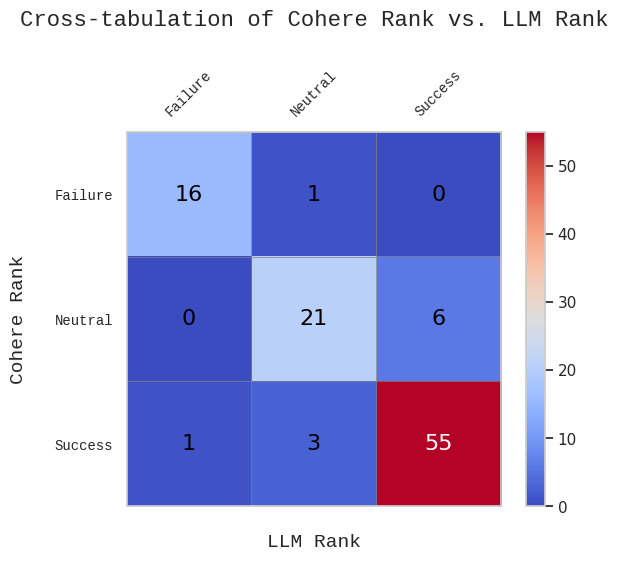

In [329]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assuming 'cohere_llm_subset_df' is already defined and contains 'cohere_rank' and 'llm_rank' columns
# Create a cross-tabulation table
ct = pd.crosstab(cohere_llm_subset_df['cohere_rank'], cohere_llm_subset_df['llm_rank'])

# Define font properties
title_font = {'family': 'Liberation Mono', 'weight': 'normal', 'size': 16}
label_font = {'family': 'Liberation Mono', 'size': 14}
axis_label = {'family': 'Liberation Mono', 'size': 10}

# Plotting
fig, ax = plt.subplots()
cax = ax.matshow(ct, cmap='coolwarm')
# Add color bar for reference
fig.colorbar(cax)

# Set the major ticks at the right locations
ax.set_xticks(np.arange(len(ct.columns)))
ax.set_yticks(np.arange(len(ct.index)))

# Set the labels for the major ticks
ax.set_xticklabels(ct.columns, rotation=45, fontdict=axis_label)
ax.set_yticklabels(ct.index, fontdict=axis_label)

# bring label to bottom x-axis
# ax.xaxis.tick_bottom()

# Add axis labels
ax.set_xlabel('LLM Rank', fontdict=label_font, labelpad=20)  # Increase labelpad value here
ax.set_ylabel('Cohere Rank', fontdict=label_font, labelpad=20)
# Add a title
ax.set_title('Cross-tabulation of Cohere Rank vs. LLM Rank', fontdict=title_font, pad=30)
# Hide the grid lines
ax.grid(False)
ax.tick_params(axis='x', which='both', top=False, bottom=False)  # This line removes the bottom tick marks

# Optionally, set the minor tick marks to be in the center of the cells for the grid lines if needed
ax.set_xticks(np.arange(len(ct.columns) + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(len(ct.index) + 1) - 0.5, minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
# Optional: Add values on the cells for better readability
for (i, j), val in np.ndenumerate(ct.values):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > ct.values.max() / 2 else 'black', fontsize=16)  # Adjust text color based on cell color

plt.subplots_adjust(bottom=0.1)
plt.savefig('./plots/heatmap_top.png', bbox_inches='tight')
# plt.close()
plt.show()


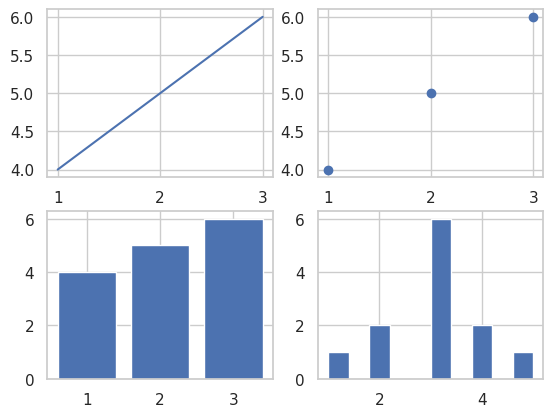

In [201]:
# a=sns.catplot(data=llm_subset_df, x="llm_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# a.set(title="LLM Performance")
# b=sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# b.set(title='LLM Performance vs Cohere Score')
# c=sns.catplot(data=llm_subset_df, x="cohere_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# c.set(title='Cohere Performance')
# d=sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# d.set(title='Cohere Performance vs Cohere Score')

# fig, ((ax1, bx1), (c, d)) = plt.subplots(2, 2)
# ax1=sns.catplot(data=llm_subset_df, x="llm_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# ax1.set(title="LLM Performance")
# bx1=sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# bx1.set(title='LLM Performance vs Cohere Score')

import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)
 
# # Now axs is a 2D array of Axes objects
# axs[0, 0] = sns.catplot(data=llm_subset_df, x="llm_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# axs[0, 1] = sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# axs[1, 0] = sns.catplot(data=llm_subset_df, x="cohere_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# axs[1, 1] = sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")


axs[0, 0].plot([1, 2, 3], [4, 5, 6])
axs[0, 1].scatter([1, 2, 3], [4, 5, 6])
axs[1, 0].bar([1, 2, 3], [4, 5, 6])
axs[1, 1].hist([1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5])
 
plt.show()

# # Plot counts for each category in 'llm_rank'
# sns.catplot(data=llm_subset_df, x="llm_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# plt.title('LLM Performance')
# sns.catplot(data=llm_subset_df, x="llm_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# plt.title('LLM Performance vs Cohere Score')
# sns.catplot(data=llm_subset_df, x="cohere_rank", order=['Failure', 'Neutral', 'Success'], kind="count", height=4, aspect=1.2)
# plt.title('Cohere Performance')
# sns.catplot(data=llm_subset_df, x="cohere_rank", y="relevance_score", order=['Failure', 'Neutral', 'Success'], kind="box")
# plt.title('Cohere Performance vs Cohere Score')




/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_values([])
dict_keys([])


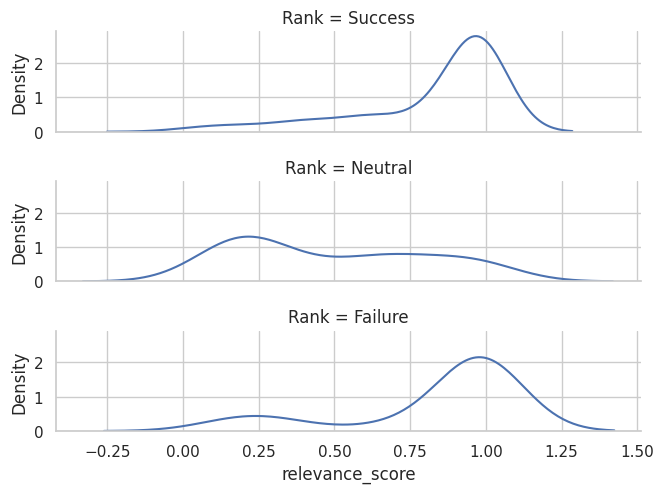

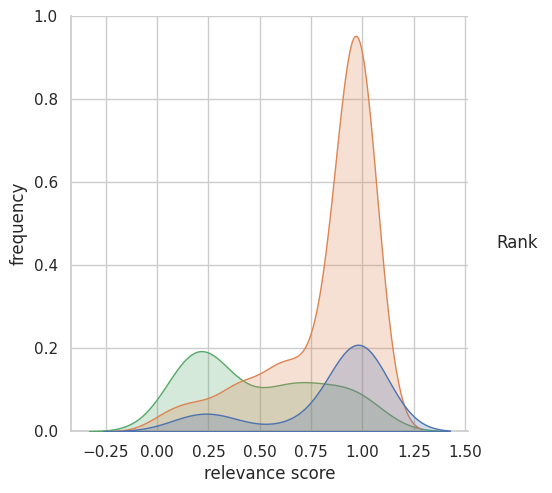

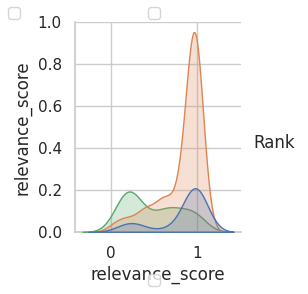

In [224]:
# WORK IN PROGRESS

stacked_df
ordered_ranks = stacked_df.Rank.value_counts().index
# ignore - RS distribution > 1
a = sns.FacetGrid(stacked_df, row="Rank", row_order=ordered_ranks, 
                  height=1.7, aspect=4,)
a.map(sns.kdeplot, "relevance_score")

b = sns.pairplot(stacked_df, hue="Rank", height=5) #palette='Set2'
b.set(xlabel="relevance score", ylabel="frequency")

c = sns.pairplot(stacked_df, hue='Rank', markers='d', size=2.5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

print(c._legend_data.values())
print(c._legend_data.keys())

handles = c._legend_data.values()
labels = c._legend_data.keys()
c.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
c.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
c.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
c.fig.subplots_adjust(top=0.92, bottom=0.08)

# handles, labels = fig.get_axes()[1].get_legend_handles_labels()